## marketing_campaign.csv

### Customer Personality Analysis: 고객 특성 분석
https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis

### 변수 정보

People 

* ID: Customer's unique identifier : 고객번호
* Year_Birth: Customer's birth year  : 출생연도
* Education: Customer's education level  : 교육수준, 학력
* Marital_Status: Customer's marital status  : 결혼 상태
* Income: Customer's yearly household income  : 가구 소득
* Kidhome: Number of children in customer's household  : 자녀 수
* Teenhome: Number of teenagers in customer's household  : 청소년 자녀 수
* Dt_Customer: Date of customer's enrollment with the company  : 고객 회사 등록 날짜
* Recency: Number of days since customer's last purchase  : 고객의 마지막 구매 이후 일 수
* Complain: 1 if the customer complained in the last 2 years, 0 otherwise  : 지난 2년간 고객의 컴플레인 여부(한 경우 1, 아니면 0)

Products 

* MntWines: Amount spent on wine in last 2 years  : 지난 2년 와인 지출 비용
* MntFruits: Amount spent on fruits in last 2 years  : 지난 2년 과일 지출 비용
* MntMeatProducts: Amount spent on meat in last 2 years  : 지난 2년 육류 지출 비용
* MntFishProducts: Amount spent on fish in last 2 years  : 지난 2년 생선류 지출 비용
* MntSweetProducts: Amount spent on sweets in last 2 years  : 지난 2년 간식 지출 비용
* MntGoldProds: Amount spent on gold in last 2 years  : 지난 2년간 금 지출 비용


Promotion

* NumDealsPurchases: Number of purchases made with a discount  : 할인일 때 구매한 횟수
* AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise  : 첫 번째 캠페인에서 제안 수락한 경우 1, 그 외 0
* AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise  : 두 번재 캠페인에서 제안 수락한 경우 1,  그 외 0
* AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise  : 세 번째 캠페인에서 제안 수락한 경우 1, 그 외 0
* AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise  : 네 번째 캠페인에서 제안 수락한 경우 1,  그 외 0
* AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise  : 다섯 번째 캠페인에서 제안 수락한 경우 1,  그 외 0
* Response: 1 if customer accepted the offer in the last campaign, 0 otherwise  : 마지막 캠페인에서 제안 수락한 경우 1,  그 외 0

Place

* NumWebPurchases: Number of purchases made through the company’s website : 웹사이트를 통해 구매한 횟수
* NumCatalogPurchases: Number of purchases made using a catalogue : 카탈로그를 통해 구매한 횟수
* NumStorePurchases: Number of purchases made directly in stores : 가게에서 구매한 횟수
* NumWebVisitsMonth: Number of visits to company’s website in the last month : 지난 달 웹사이트를 방문수

In [ ]:
# 0724

* 전처리
1. Age 100살 이상 지우기 //
2. Income 결측치 24개 지우기 //
3. Income 이상치 8개 지우기 //
4. Mnt 이상치는 그대로 사용하기 //


* 다음주까지
1. 추가변수/파생변수 더 생각해보고 //
2. Income과 상관관계 파악해보기 //

그 다음에 모델 공부하고 적용하고 파라미터 조정하고...

In [1]:
# 모듈 불러오기

import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

from numpy import nan 
from sklearn.impute import SimpleImputer

In [2]:
# 데이터 불러오기

market_df = pd.read_csv("marketing_campaign.csv")
market_df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


### 1. 중복 데이터 확인

In [3]:
market_df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2235    False
2236    False
2237    False
2238    False
2239    False
Length: 2240, dtype: bool

In [4]:
# 중복 데이터 없음

market_df[market_df.duplicated()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


### 2. 결측치 처리

In [5]:
# 결측치 확인하기
# income 24개 결측치

market_df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [6]:
# 결측치 확인하기

market_df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

###  결측치 삭제 (income 24개)

In [7]:
# 결측치 처리 >> income 24개 데이터 삭제

marketn_df = market_df.dropna()

In [8]:
# 결측치 제거 후 확인하기
# 결측치 0개

marketn_df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [10]:
# 결측치 삭제 후 행 2216개
marketn_df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


### 3. 이상치

<function matplotlib.pyplot.show(close=None, block=None)>

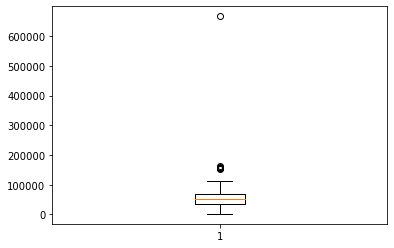

In [16]:
# income변수 박스플롯

fig, ax = plt.subplots()
ax.boxplot(marketn_df.Income)
plt.show

In [28]:
# 이상치 탐지 함수
def outliers(data):
    q1, q3 = np.percentile(data, [25,75])
    
    iqr = q3 - q1
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)
    
    return np.where((data>upper_bound)|(data<lower_bound))

In [30]:
outliers(marketn_df.Income)

(array([ 153,  604,  642,  674, 1287, 1636, 2109, 2209], dtype=int64),)

In [26]:
def outlier_iqr(data, column): 

    # lower, upper 글로벌 변수 선언하기     
    global lower, upper    
    
    # 4분위수 기준 지정하기     
    q25, q75 = np.quantile(data[column], 0.25), np.quantile(data[column], 0.75)          
    
    # IQR 계산하기     
    iqr = q75 - q25    
    
    # outlier cutoff 계산하기     
    cut_off = iqr * 1.5          
    
    # lower와 upper bound 값 구하기     
    lower, upper = q25 - cut_off, q75 + cut_off     
    
    print('IQR은',iqr, '이다.')     
    print('lower bound 값은', lower, '이다.')     
    print('upper bound 값은', upper, '이다.')    
  
    
    # 이상치 존재 행
    return np.where((data[column]>upper)|(data[column]<lower))

In [27]:
outlier_iqr(marketn_df, 'Income')

IQR은 33219.0 이다.
lower bound 값은 -14525.5 이다.
upper bound 값은 118350.5 이다.


(array([ 153,  604,  642,  674, 1287, 1636, 2109, 2209], dtype=int64),)

In [33]:
# Income 이상치 8개 지우기
## 2208행

marketo_df = marketn_df[(marketn_df['Income'] < upper) & (marketn_df['Income'] > lower)]
marketo_df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [35]:
len(marketo_df)

2208

### 4. 추가변수/파생변수

In [38]:
# 회사 등록 날짜 dt_customer 변수 >> datetime 변환

marketo_df['Dt_Customer'] = pd.to_datetime(marketo_df['Dt_Customer'])

C:\Users\abab6\AppData\Local\Temp/ipykernel_25656/1666961187.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marketo_df['Dt_Customer'] = pd.to_datetime(marketo_df['Dt_Customer'])


In [39]:
# 1. 월 변수

marketo_df['Dt_Year'] = marketo_df['Dt_Customer'].dt.year # 연도 정보
marketo_df.head()

C:\Users\abab6\AppData\Local\Temp/ipykernel_25656/3031273515.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marketo_df['Dt_Year'] = marketo_df['Dt_Customer'].dt.year # 연도 정보


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Dt_Year
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,0,0,0,0,0,0,3,11,1,2012
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,0,0,0,0,0,0,3,11,0,2014
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,2013
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,0,0,0,0,0,0,3,11,0,2014
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,3,11,0,2014


In [40]:
# 2. 연도 변수

marketo_df['Dt_Month'] = marketo_df['Dt_Customer'].dt.month # 월 정보
marketo_df.head()

C:\Users\abab6\AppData\Local\Temp/ipykernel_25656/1884058987.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marketo_df['Dt_Month'] = marketo_df['Dt_Customer'].dt.month # 월 정보


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Dt_Year,Dt_Month
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,0,0,0,0,0,3,11,1,2012,4
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,0,0,0,0,0,3,11,0,2014,8
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,3,11,0,2013,8
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,0,0,0,0,0,3,11,0,2014,10
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,3,11,0,2014,1


In [41]:
# 3. 나이 변수

marketo_df['Age'] = 2022 - marketo_df['Year_Birth'] + 1
marketo_df.head()

C:\Users\abab6\AppData\Local\Temp/ipykernel_25656/3378757141.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marketo_df['Age'] = 2022 - marketo_df['Year_Birth'] + 1


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Dt_Year,Dt_Month,Age
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,0,0,0,0,3,11,1,2012,4,66
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,0,0,0,0,3,11,0,2014,8,69
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,3,11,0,2013,8,58
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,0,0,0,0,3,11,0,2014,10,39
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,3,11,0,2014,1,42


In [44]:
marketo_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2208 entries, 0 to 2239
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2208 non-null   int64         
 1   Year_Birth           2208 non-null   int64         
 2   Education            2208 non-null   object        
 3   Marital_Status       2208 non-null   object        
 4   Income               2208 non-null   float64       
 5   Kidhome              2208 non-null   int64         
 6   Teenhome             2208 non-null   int64         
 7   Dt_Customer          2208 non-null   datetime64[ns]
 8   Recency              2208 non-null   int64         
 9   MntWines             2208 non-null   int64         
 10  MntFruits            2208 non-null   int64         
 11  MntMeatProducts      2208 non-null   int64         
 12  MntFishProducts      2208 non-null   int64         
 13  MntSweetProducts     2208 non-nul

In [46]:
# 4. 지출 총액

marketo_df['TotalMnt'] = marketo_df['MntWines'] +marketo_df['MntFruits'] + marketo_df['MntMeatProducts'] +marketo_df['MntFishProducts'] +  marketo_df['MntSweetProducts']+  marketo_df['MntGoldProds']
    
marketo_df

C:\Users\abab6\AppData\Local\Temp/ipykernel_25656/2230519535.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marketo_df['TotalMnt'] = marketo_df['MntWines'] +marketo_df['MntFruits'] + marketo_df['MntMeatProducts'] +marketo_df['MntFishProducts'] +  marketo_df['MntSweetProducts']+  marketo_df['MntGoldProds']


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Dt_Year,Dt_Month,Age,TotalMnt
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,0,0,0,3,11,1,2012,4,66,1617
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,0,0,0,3,11,0,2014,8,69,27
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,3,11,0,2013,8,58,776
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,0,0,0,3,11,0,2014,10,39,53
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,3,11,0,2014,1,42,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,0,0,3,11,0,2013,6,56,1341
2236,4001,1946,PhD,Together,64014.0,2,1,2014-10-06,56,406,...,1,0,0,3,11,0,2014,10,77,444
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,0,0,3,11,0,2014,1,42,1241
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,0,0,3,11,0,2014,1,67,843


In [47]:
# 5. 총 구매 수

marketo_df['TotalNum'] =marketo_df['NumDealsPurchases'] + marketo_df['NumWebPurchases'] + marketo_df['NumCatalogPurchases']+ marketo_df['NumStorePurchases'] 

marketo_df

C:\Users\abab6\AppData\Local\Temp/ipykernel_25656/974219499.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marketo_df['TotalNum'] =marketo_df['NumDealsPurchases'] + marketo_df['NumWebPurchases'] + marketo_df['NumCatalogPurchases']+ marketo_df['NumStorePurchases']


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Dt_Year,Dt_Month,Age,TotalMnt,TotalNum
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,0,0,3,11,1,2012,4,66,1617,25
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,0,0,3,11,0,2014,8,69,27,6
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,3,11,0,2013,8,58,776,21
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,0,0,3,11,0,2014,10,39,53,8
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,3,11,0,2014,1,42,422,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,0,3,11,0,2013,6,56,1341,18
2236,4001,1946,PhD,Together,64014.0,2,1,2014-10-06,56,406,...,0,0,3,11,0,2014,10,77,444,22
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,0,3,11,0,2014,1,42,1241,19
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,0,3,11,0,2014,1,67,843,23


In [48]:
# 6. 총 자녀 수

marketo_df["Children"] = marketo_df["Kidhome"] + marketo_df["Teenhome"]
marketo_df

C:\Users\abab6\AppData\Local\Temp/ipykernel_25656/3632271787.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marketo_df["Children"] = marketo_df["Kidhome"] + marketo_df["Teenhome"]


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Complain,Z_CostContact,Z_Revenue,Response,Dt_Year,Dt_Month,Age,TotalMnt,TotalNum,Children
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,0,3,11,1,2012,4,66,1617,25,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,0,3,11,0,2014,8,69,27,6,2
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,3,11,0,2013,8,58,776,21,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,0,3,11,0,2014,10,39,53,8,1
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,3,11,0,2014,1,42,422,19,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,3,11,0,2013,6,56,1341,18,1
2236,4001,1946,PhD,Together,64014.0,2,1,2014-10-06,56,406,...,0,3,11,0,2014,10,77,444,22,3
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,3,11,0,2014,1,42,1241,19,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,3,11,0,2014,1,67,843,23,1


### 5. Age > 100 삭제

In [49]:
#  Age > 100 인 데이터 확인
## 3개

marketo_df[marketo_df['Age'] > 100]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Complain,Z_CostContact,Z_Revenue,Response,Dt_Year,Dt_Month,Age,TotalMnt,TotalNum,Children
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,...,1,3,11,0,2013,9,123,65,6,1
239,11004,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,...,0,3,11,0,2014,5,130,22,4,1
339,1150,1899,PhD,Together,83532.0,0,0,2013-09-26,36,755,...,0,3,11,0,2013,9,124,1853,15,0


In [50]:
# Age < 100 인 데이터만 포함
## 2205행

marketa_df = marketo_df[marketo_df['Age'] < 100]
marketa_df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Complain,Z_CostContact,Z_Revenue,Response,Dt_Year,Dt_Month,Age,TotalMnt,TotalNum,Children
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,0,3,11,1,2012,4,66,1617,25,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,0,3,11,0,2014,8,69,27,6,2
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,3,11,0,2013,8,58,776,21,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,0,3,11,0,2014,10,39,53,8,1
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,3,11,0,2014,1,42,422,19,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,3,11,0,2013,6,56,1341,18,1
2236,4001,1946,PhD,Together,64014.0,2,1,2014-10-06,56,406,...,0,3,11,0,2014,10,77,444,22,3
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,3,11,0,2014,1,42,1241,19,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,3,11,0,2014,1,67,843,23,1


In [56]:
# 변수 삭제

marketa_df= marketa_df.drop(columns = ['Z_CostContact','Z_Revenue'])
marketa_df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Dt_Year,Dt_Month,Age,TotalMnt,TotalNum,Children
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,0,0,0,1,2012,4,66,1617,25,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,0,0,0,0,2014,8,69,27,6,2
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,2013,8,58,776,21,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,0,0,0,0,2014,10,39,53,8,1
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,2014,1,42,422,19,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,0,0,0,2013,6,56,1341,18,1
2236,4001,1946,PhD,Together,64014.0,2,1,2014-10-06,56,406,...,1,0,0,0,2014,10,77,444,22,3
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,0,0,0,2014,1,42,1241,19,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,0,0,0,2014,1,67,843,23,1


### 6. 상관관계

In [57]:
m_corr = marketa_df.corr()
m_corr 

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Dt_Year,Dt_Month,Age,TotalMnt,TotalNum,Children
ID,1.000000,0.007344,0.001633,0.002030,-0.003292,-0.046991,-0.018822,0.010178,-0.001817,-0.022333,...,-0.018042,-0.014934,0.031882,-0.021187,-0.007577,0.029399,-0.007344,-0.013573,-0.020174,-0.000937
Year_Birth,0.007344,1.000000,-0.212625,0.238083,-0.362919,-0.014228,-0.164438,-0.013149,-0.041540,-0.040855,...,-0.011747,-0.007737,-0.004531,0.021305,-0.023908,0.011242,-1.000000,-0.118404,-0.186733,-0.093007
Income,0.001633,-0.212625,1.000000,-0.531699,0.042483,0.006716,0.730495,0.537920,0.702500,0.551758,...,0.345242,0.110210,-0.027488,0.174902,0.025237,0.010016,0.212625,0.823770,0.701568,-0.350313
Kidhome,0.002030,0.238083,-0.531699,1.000000,-0.040207,0.011829,-0.499288,-0.374388,-0.445665,-0.389895,...,-0.174741,-0.082124,0.037025,-0.078409,0.054210,0.000924,-0.238083,-0.558234,-0.485597,0.687697
Teenhome,-0.003292,-0.362919,0.042483,-0.040207,1.000000,0.013881,0.002783,-0.176925,-0.267177,-0.206371,...,-0.145748,-0.015805,0.007633,-0.155196,-0.010814,0.004841,0.362919,-0.138565,0.133866,0.697760
Recency,-0.046991,-0.014228,0.006716,0.011829,0.013881,1.000000,0.016470,-0.004909,0.026138,0.001177,...,-0.021097,-0.001390,0.005758,-0.200413,-0.029089,-0.006303,0.014228,0.021824,0.009414,0.018566
MntWines,-0.018822,-0.164438,0.730495,-0.499288,0.002783,0.016470,1.000000,0.384947,0.593119,0.395967,...,0.351346,0.206231,-0.036709,0.245559,-0.154474,0.037033,0.164438,0.897262,0.721080,-0.355922
MntFruits,0.010178,-0.013149,0.537920,-0.374388,-0.176925,-0.004909,0.384947,1.000000,0.568100,0.592556,...,0.192061,-0.010147,-0.003135,0.122331,-0.054170,-0.001754,0.013149,0.614464,0.458562,-0.396954
MntMeatProducts,-0.001817,-0.041540,0.702500,-0.445665,-0.267177,0.026138,0.593119,0.568100,1.000000,0.595673,...,0.325306,0.045842,-0.020921,0.248821,-0.079831,0.039032,0.041540,0.856838,0.560159,-0.513629
MntFishProducts,-0.022333,-0.040855,0.551758,-0.389895,-0.206371,0.001177,0.395967,0.592556,0.595673,1.000000,...,0.261389,0.002093,-0.019299,0.107405,-0.066615,-0.013100,0.040855,0.644453,0.472588,-0.429466


### income과의 상관관계

In [65]:
marketa_df.corr().Income

ID                     0.001633
Year_Birth            -0.212625
Income                 1.000000
Kidhome               -0.531699
Teenhome               0.042483
Recency                0.006716
MntWines               0.730495
MntFruits              0.537920
MntMeatProducts        0.702500
MntFishProducts        0.551758
MntSweetProducts       0.555601
MntGoldProds           0.417653
NumDealsPurchases     -0.132427
NumWebPurchases        0.503184
NumCatalogPurchases    0.710057
NumStorePurchases      0.687206
NumWebVisitsMonth     -0.648306
AcceptedCmp3          -0.011181
AcceptedCmp4           0.233267
AcceptedCmp5           0.416386
AcceptedCmp1           0.345242
AcceptedCmp2           0.110210
Complain              -0.027488
Response               0.174902
Dt_Year                0.025237
Dt_Month               0.010016
Age                    0.212625
TotalMnt               0.823770
TotalNum               0.701568
Children              -0.350313
Name: Income, dtype: float64

In [60]:
# 음의 상관관계 - 어린이
marketa_df["Income"].corr(marketa_df["Kidhome"])

-0.531698919774873

In [61]:
# 강한 양의 상관관계 - 와인
marketa_df["Income"].corr(marketa_df["MntWines"])

0.7304951613642848

In [62]:
# 양의 상관관계 - 과일
marketa_df["Income"].corr(marketa_df["MntFruits"])

0.5379202581686495

In [63]:
# 강한 양의 상관관계 - 육류
marketa_df["Income"].corr(marketa_df["MntMeatProducts"])

0.702499619645679

In [64]:
# 양의 상관관계 - 생선
marketa_df["Income"].corr(marketa_df["MntFishProducts"])

0.5517580018179091

In [66]:
# 양의 상관관계 - 간식
marketa_df["Income"].corr(marketa_df["MntSweetProducts"])

0.5556010365636543

In [67]:
# 양의 상관관계 - 웹 구매 건수
marketa_df["Income"].corr(marketa_df["NumWebPurchases"])

0.5031842017362943

In [68]:
# 강한 양의 상관관계 - 카탈로그를 통해 구매
marketa_df["Income"].corr(marketa_df["NumCatalogPurchases"])

0.710056534147072

In [69]:
# 양의 상관관계 - 가게를 통해 구매
marketa_df["Income"].corr(marketa_df["NumStorePurchases"])

0.6872057162979321

In [70]:
# 음의 상관관계 - 웹 방문수
marketa_df["Income"].corr(marketa_df["NumWebVisitsMonth"])

-0.6483062734574427

In [ ]:
## 추가변수/파생변수

In [71]:
# 강한 양의 상관관계 - 총 구매 액
marketa_df["Income"].corr(marketa_df["TotalMnt"])

0.8237696997821239

In [72]:
# 강한 양의 상관관계 - 총 구매 건수
marketa_df["Income"].corr(marketa_df["TotalNum"])

0.701568253970574

In [58]:
# 상관계수 최대값
m_corr = m_corr[m_corr != 1] # 상관계수 1 제외
m_corr[m_corr == m_corr.max()]

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Dt_Year,Dt_Month,Age,TotalMnt,TotalNum,Children
ID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year_Birth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Kidhome,NaN,0.238083,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.037025,NaN,0.05421,NaN,NaN,NaN,NaN,NaN
Teenhome,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.362919,NaN,NaN,0.69776
Recency,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MntWines,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.897262,NaN,NaN
MntFruits,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MntMeatProducts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.039032,NaN,NaN,NaN,NaN
MntFishProducts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
# 상관계수 최솟값
m_corr = m_corr[m_corr != 1] # 상관계수 1 제외
m_corr[m_corr == m_corr.min()]

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Dt_Year,Dt_Month,Age,TotalMnt,TotalNum,Children
ID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year_Birth,NaN,NaN,NaN,NaN,-0.362919,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN
Income,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Kidhome,NaN,NaN,NaN,NaN,NaN,NaN,-0.499288,NaN,NaN,NaN,...,NaN,-0.082124,NaN,NaN,NaN,NaN,NaN,-0.558234,-0.485597,NaN
Teenhome,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Recency,-0.046991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-0.200413,NaN,NaN,NaN,NaN,NaN,NaN
MntWines,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-0.036709,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MntFruits,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MntMeatProducts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.513629
MntFishProducts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

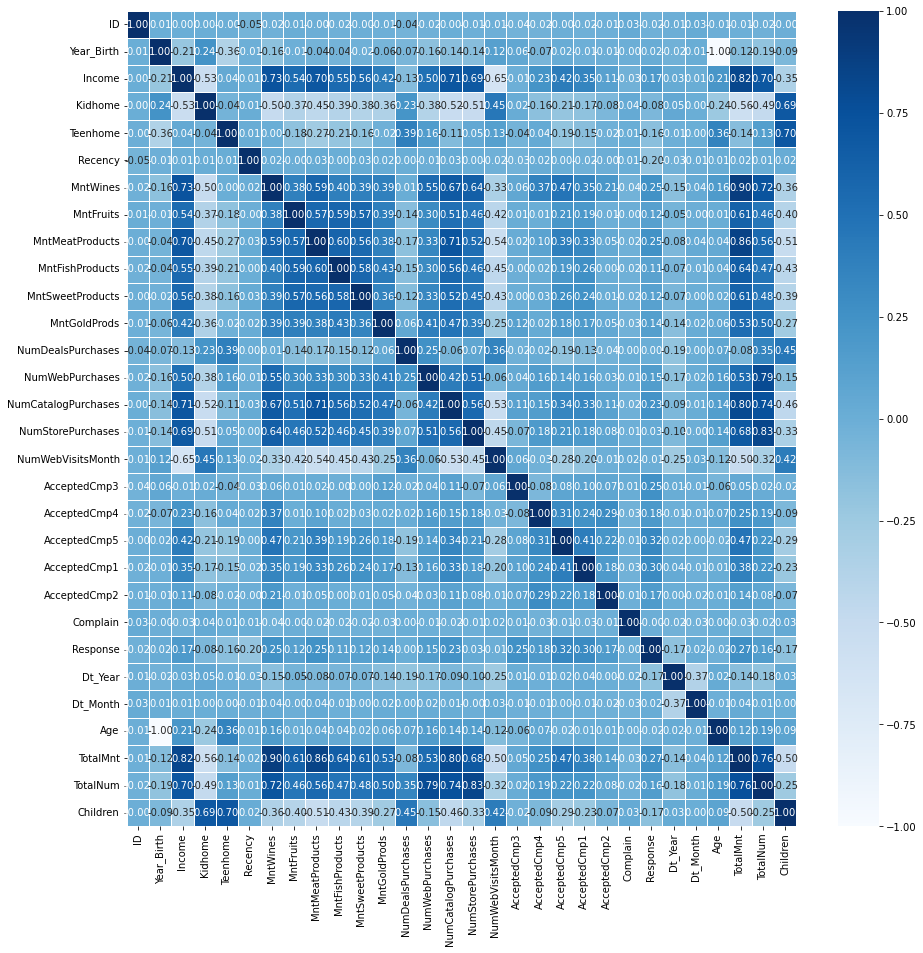

In [73]:
# 히트맵

plt.figure(figsize=(15,15))
sns.heatmap(data = marketa_df.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

In [ ]:
# 모델 공부하기
# 그러면 추가해서 모델 ..돌려볼수있음 돌려보기
# 모델공부하고 더미변수 변환해보고
# 민영님이 말씀하신것처럼 차원축소도 공부